# Global Entities - per Entity Group - Visualizer 

#### Version 1.0

### TODO

- ~~Line plot for world~~
- Line plot of aggregated countries and compare to world
- ~~Line plot per country/region/income/etc~~
- ~~Heatmap for corellation between metrics per entity~~
- Correlation between metrics across entities

### Observations

## Setup

### Import Packages

In [2]:
from datetime import datetime, date
from pprint import pprint
from collections import OrderedDict
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Set ipython's max row display
# pd.set_option('display.max_row', 1000)
# Set iPython's max column width
pd.set_option('display.max_columns', 50)

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [20, 10]

### Functions

In [3]:
def masked_heatmap():
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig,ax = plt.subplots()
    sns.heatmap(corr,center = 0, fmt = ".3f", square = True, annot= True, mask=mask)

## Global Variables

#### Dataset Parameters

In [12]:
file_name = '../data/forecasts_tables/all_entities_forecasts.csv'

year_range = [1960, 2022]

In [13]:
country_list = ['United Arab Emirates', 'Japan', 'Ghana'] #For country level analysis

In [7]:
key_columns = [
    'Annual CO2 emissions', 'Annual change in primary energy consumption (%)',
    'Per capita electricity (kWh)',
    'Fossil fuels per capita (kWh)', 'Fossil fuels (% equivalent primary energy)',
    'Renewables per capita (kWh - equivalent)', 'Renewables (% electricity)',
    'Solar Generation - TWh', 'prod of Electricity from solar (TWh)',
]

corr_columns = [
    'Annual CO2 emissions', 'Annual change in primary energy consumption (%)',
    'Per capita electricity (kWh)',
    'Fossil fuels per capita (kWh)',
    'Renewables per capita (kWh - equivalent)',
]

## Data Prep

In [8]:
df_original = pd.read_csv(file_name)

In [9]:
df_original = df_original.loc[
    (df_original['Year'] > year_range[0])
    & (df_original['Year'] < year_range[1])
]

KeyError: 'Year'

In [ ]:
df_original.info()

In [10]:
df_original.head()

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Entity
0,1961-01-01,645553.0,348571.965280,-410566.903827,1.336181e+06,348571.965280,348571.965280,116000.995604,116000.995604,116000.995604,116000.995604,116000.995604,116000.995604,0.0,0.0,0.0,464572.960884,Aruba
1,1962-01-01,708942.0,370306.270320,-383487.773904,1.341374e+06,370306.270320,370306.270320,99154.731984,99154.731984,99154.731984,99154.731984,99154.731984,99154.731984,0.0,0.0,0.0,469461.002304,Aruba
2,1963-01-01,679088.0,392040.575359,-300708.331478,1.316585e+06,392040.575359,392040.575359,89222.225921,89222.225921,89222.225921,89222.225921,89222.225921,89222.225921,0.0,0.0,0.0,481262.801281,Aruba
3,1964-01-01,660275.0,413774.880414,-381631.424981,1.405229e+06,413774.880414,413774.880414,86215.622238,86215.622238,86215.622238,86215.622238,86215.622238,86215.622238,0.0,0.0,0.0,499990.502652,Aruba
4,1965-01-01,592387.0,435568.731510,-256463.054285,1.410202e+06,435568.731510,435568.731510,116000.995604,116000.995604,116000.995604,116000.995604,116000.995604,116000.995604,0.0,0.0,0.0,551569.727113,Aruba


In [11]:
df_original.describe()

,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,1.257000e+04,1.269800e+04,1.269800e+04,1.269800e+04,1.269800e+04,1.269800e+04,1.269800e+04,1.269800e+04,1.269800e+04,1.269800e+04,1.269800e+04,1.269800e+04,12698.0,12698.0,12698.0,1.269800e+04
mean,1.073182e+08,5.593663e+07,9.617579e+07,1.221570e+08,5.593550e+07,5.593768e+07,5.320146e+07,5.320146e+07,5.320146e+07,5.320146e+07,5.320146e+07,5.320146e+07,0.0,0.0,0.0,1.091381e+08
std,5.251210e+08,3.655583e+08,4.961248e+08,5.719043e+08,3.655451e+08,3.655700e+08,2.632249e+08,2.632249e+08,2.632249e+08,2.632249e+08,2.632249e+08,2.632249e+08,0.0,0.0,0.0,5.328410e+08
min,3.664000e+03,-7.749580e+08,-4.946283e+08,-2.116933e+04,-7.749580e+08,-7.749580e+08,-1.477012e+08,-1.477012e+08,-1.477012e+08,-1.477012e+08,-1.477012e+08,-1.477012e+08,0.0,0.0,0.0,-2.163174e+07
25%,6.016012e+05,4.339533e+03,2.803032e+05,1.014825e+06,4.339533e+03,4.339533e+03,1.683868e+04,1.683868e+04,1.683868e+04,1.683868e+04,1.683868e+04,1.683868e+04,0.0,0.0,0.0,6.513244e+05
50%,4.977133e+06,8.764619e+05,3.091571e+06,7.668935e+06,8.764619e+05,8.764619e+05,1.312093e+06,1.312093e+06,1.312093e+06,1.312093e+06,1.312093e+06,1.312093e+06,0.0,0.0,0.0,5.401812e+06
75%,4.187498e+07,1.434392e+07,3.442825e+07,4.979856e+07,1.434392e+07,1.434392e+07,1.304627e+07,1.304627e+07,1.304627e+07,1.304627e+07,1.304627e+07,1.304627e+07,0.0,0.0,0.0,4.268381e+07
max,1.066789e+10,1.101750e+10,1.128439e+10,1.248089e+10,1.101269e+10,1.102170e+10,3.196982e+09,3.196982e+09,3.196982e+09,3.196982e+09,3.196982e+09,3.196982e+09,0.0,0.0,0.0,1.186123e+10


## Visualizations

### World

In [11]:
category_filter = "World"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [12]:
df.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh),Entity_Category
27626,World,1961,WLD,NaN,NaN,NaN,NaN,NaN,NaN,1.296290e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.695278,NaN,NaN,NaN,9.417463e+09,NaN,World
27627,World,1962,WLD,NaN,NaN,NaN,NaN,NaN,NaN,1.296290e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.103871,NaN,NaN,NaN,9.750057e+09,NaN,World
27628,World,1963,WLD,NaN,NaN,NaN,NaN,NaN,NaN,1.296290e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.606030,NaN,NaN,NaN,1.027152e+10,NaN,World
27629,World,1964,WLD,NaN,NaN,NaN,NaN,NaN,NaN,1.296290e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.111241,NaN,NaN,NaN,1.082886e+10,NaN,World
27630,World,1965,WLD,NaN,NaN,NaN,93.37812,NaN,NaN,1.296290e+08,12404.0,16140.178711,0.836891,0.0,17.985231,12107.379883,40433.578125,18231.082031,NaN,923.198059,12404.0,0.0,923.198059,12404.0,6303.798828,NaN,17.985231,16140.178711,NaN,17989.603516,NaN,25.627340,0.0,6303.798828,17989.603516,1.131723e+10,0.0,World


In [13]:
df.describe()

,Year,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh)
count,61.000000,57.000000,56.000000,52.000000,6.000000e+01,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,41.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,56.000000,57.000000,57.000000,37.000000,57.000000,37.000000,60.000000,57.000000,57.000000,57.000000,6.000000e+01,57.000000
mean,1991.000000,87.906087,2.216326,22949.439247,1.297172e+08,6117.754386,28584.640556,1.454433,228.345476,208.390151,15760.118198,89237.569422,38535.582511,32946.541587,2431.294728,6117.754386,84.041714,2431.294728,6117.754386,21492.190695,2.443004,208.390151,28584.640556,2741.295427,39160.740543,20.348038,41.154059,84.041714,21492.190695,39160.740543,2.316182e+10,228.345476
std,17.752934,3.220952,2.336746,8939.489789,1.359545e+05,847.656144,10007.255369,0.482532,449.014082,205.724881,1366.411639,28102.326104,8416.048570,8964.818754,985.437508,847.656144,217.619927,985.437508,847.656144,9564.826179,2.130705,205.724881,10007.255369,481.483171,8988.199100,2.784003,10.862296,217.619927,9564.826179,8988.199100,7.980183e+09,449.014082
min,1961.000000,82.211304,-5.385285,9760.991211,1.296056e+08,5978.000000,16060.809570,0.836891,0.000000,17.985231,12107.379883,40433.578125,18231.082031,21445.263672,923.198059,5978.000000,0.000000,923.198059,5978.000000,6303.798828,-3.985941,17.985231,16060.809570,2032.845825,17989.603516,17.162390,23.695278,0.000000,6303.798828,17989.603516,9.417463e+09,0.000000
25%,1976.000000,85.727249,0.696263,14695.416992,1.296271e+08,5992.000000,20363.539062,1.183239,0.006000,46.499256,15112.447266,69261.773438,33519.679688,25627.955078,1695.186157,5992.000000,0.000000,1695.186157,5992.000000,14118.032227,1.005194,46.499256,20363.539062,2283.061035,33680.054688,18.754833,31.761750,0.000000,14118.032227,33680.054688,1.775768e+10,0.006000
50%,1991.000000,86.512390,2.006173,21383.237305,1.296290e+08,6006.000000,25963.681641,1.331868,5.697569,135.519318,15486.079102,83911.687500,37619.203125,27938.126953,2341.457520,6006.000000,0.556698,2341.457520,6006.000000,20265.484375,2.243525,135.519318,25963.681641,2648.546631,38151.847656,19.407053,41.073288,0.556698,20265.484375,38151.847656,2.265960e+10,5.697569
75%,2006.000000,91.053261,3.579623,29644.438965,1.298508e+08,6020.000000,40175.359375,1.565588,171.506699,294.843079,16869.917969,115948.109375,46038.386719,42621.265625,3072.892334,6020.000000,7.817910,3072.892334,6020.000000,29315.390625,3.768480,294.843079,40175.359375,3185.902832,47172.609375,20.832720,50.297190,7.817910,29315.390625,47172.609375,2.984797e+10,171.506699
max,2021.000000,93.378120,6.728780,40368.828125,1.299870e+08,12404.000000,45161.207031,2.827960,1861.939819,762.782654,17811.734375,136131.468750,52181.949219,46550.605469,4345.990234,12404.000000,1032.501221,4345.990234,12404.000000,40374.605469,6.708479,762.782654,45161.207031,3599.092773,53368.628906,27.864630,59.731828,1032.501221,40374.605469,53368.628906,3.670250e+10,1861.939819


In [14]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

#### Lineplots - Yearly

Text(0.5, 1.0, 'Year x Annual CO2 emissions per World')

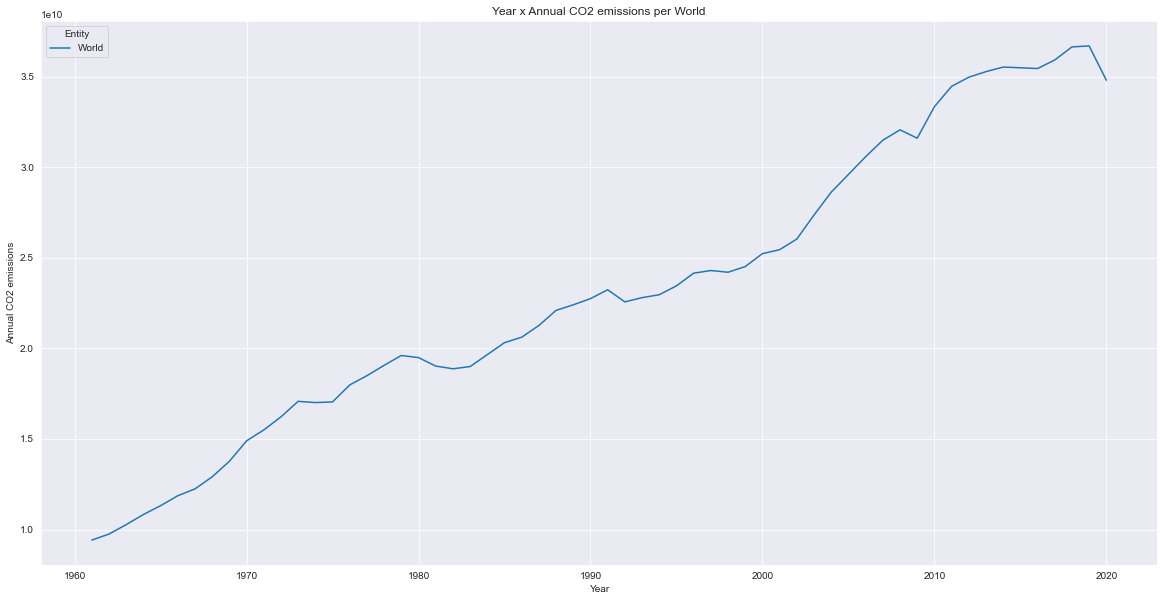

In [15]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per World")

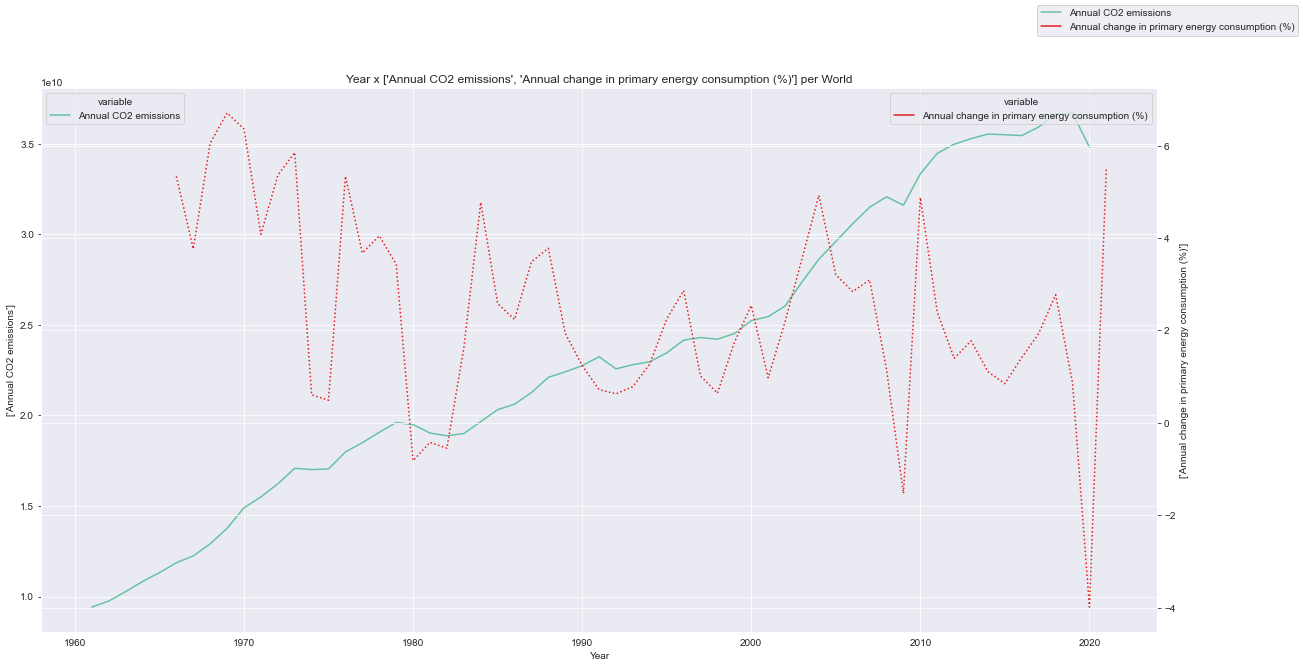

In [16]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per World")

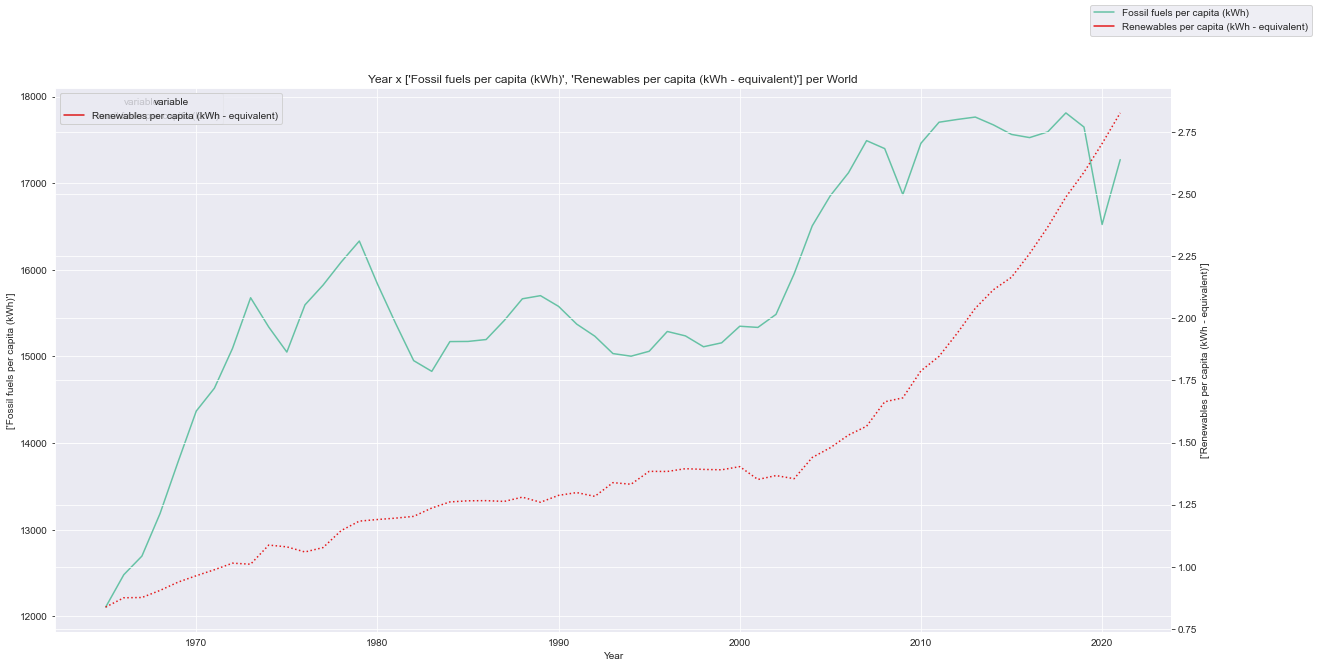

In [17]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)', 'Fossil fuels per capita (kWh)'] per World")

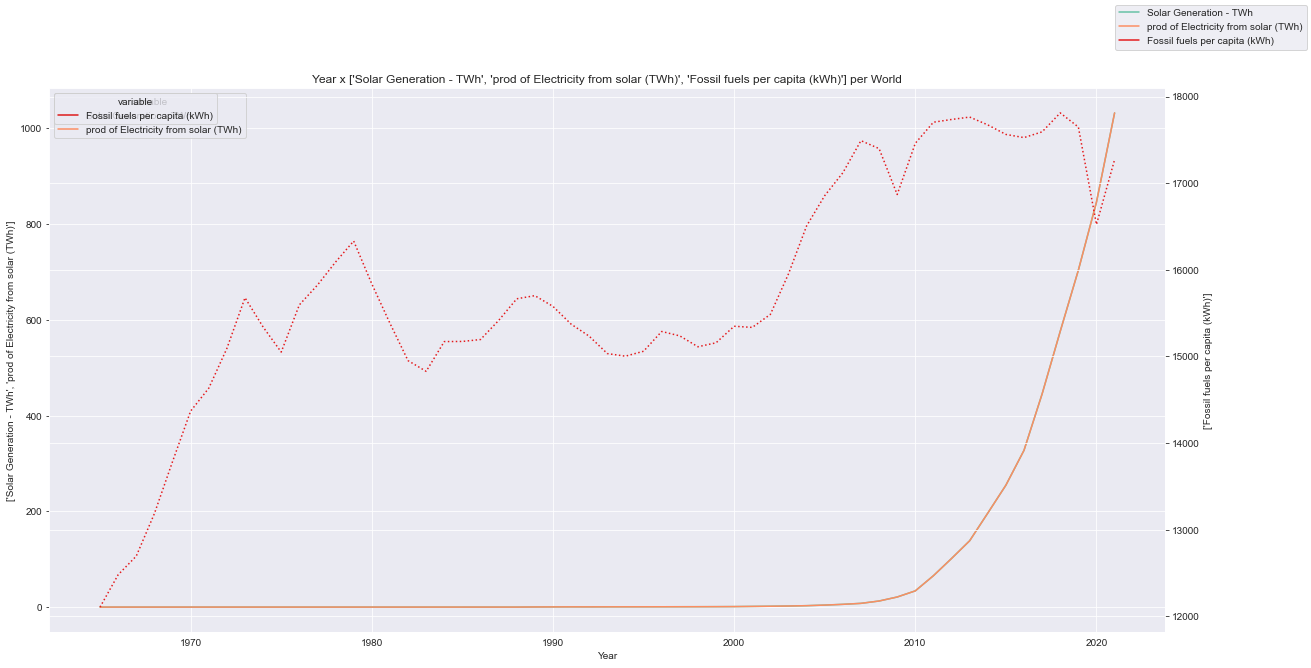

In [18]:
y1 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']
y2 = ['Fossil fuels per capita (kWh)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [19]:
corr = df[corr_columns].corr()

Text(0.5, 1.0, 'Correlation of Key Metrics across Years in Entity [World]')

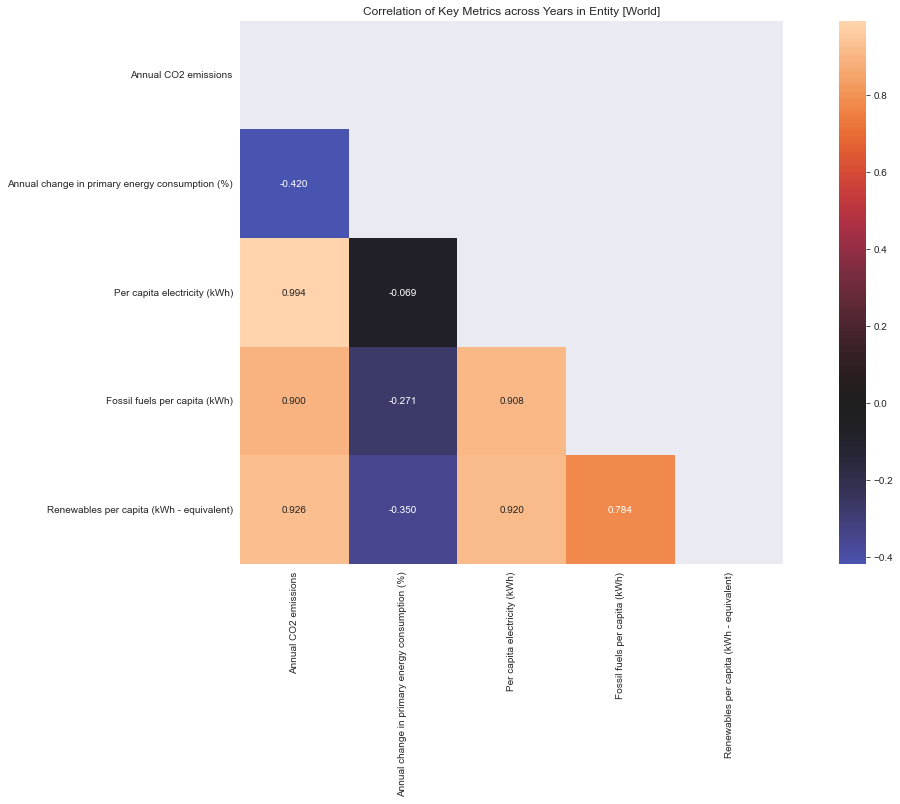

In [20]:
masked_heatmap()
plt.title(f"Correlation of Key Metrics across Years in Entity [{category_filter}]")

### Income Level

In [21]:
df_original['Entity_Category'].value_counts()

Country             13243
Bp?                  1549
Eia?                 1040
Exlusive Regions      361
Continent             344
Income Level          244
Ember?                110
World                  61
Other                  61
Name: Entity_Category, dtype: int64

In [22]:
category_filter = "Income Level"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [23]:
df.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh),Entity_Category
10966,High-Income Countries,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.297137e+09,NaN,Income Level
10967,High-Income Countries,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.600679e+09,NaN,Income Level
10968,High-Income Countries,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.952760e+09,NaN,Income Level
10969,High-Income Countries,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.300569e+09,NaN,Income Level
10970,High-Income Countries,1965,NaN,NaN,NaN,NaN,92.775543,NaN,NaN,NaN,12326.0,10125.585938,2.634769,0.0,17.885233,34896.5,28374.730469,8608.763672,NaN,705.694092,12326.0,0.0,705.694092,12326.0,NaN,NaN,17.885233,NaN,NaN,13575.577148,NaN,NaN,0.0,4673.567383,NaN,7.545914e+09,0.0,Income Level


In [24]:
df.describe()

,Year,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh)
count,244.000000,171.000000,168.000000,203.000000,0.0,225.000000,171.000000,171.000000,171.000000,193.000000,171.000000,171.000000,225.000000,123.000000,171.000000,225.000000,193.000000,193.000000,225.000000,0.0,207.000000,171.000000,0.0,133.000000,171.000000,133.000000,0.0,171.000000,171.000000,0.0,2.400000e+02,193.000000
mean,1991.000000,89.395315,3.469417,5713.456888,NaN,5164.995556,9367.830076,1.867653,75.437945,59.645270,21412.252189,28710.551440,9207.432737,10762.281830,735.307679,5164.995556,24.538201,657.537580,5164.995556,NaN,3.163113,67.225539,NaN,3378.353503,12395.928611,25.145435,NaN,27.665864,6946.793735,NaN,5.590303e+09,66.863827
std,17.643008,3.961506,8.093721,4964.952596,NaN,3368.613917,6683.579268,1.782040,184.244260,91.627820,18808.978401,18981.398904,6968.022350,6985.285411,561.301775,3368.613917,79.564569,571.177889,3368.613917,NaN,7.412832,94.736834,NaN,3652.276890,9520.041176,14.179119,NaN,84.044199,5120.665625,NaN,5.180332e+09,175.016311
min,1961.000000,79.292038,-12.149286,0.000000,NaN,1862.000000,449.159424,0.081123,0.000000,0.000000,919.215820,1022.205017,12.194840,835.380554,30.508142,1862.000000,0.000000,0.160000,1862.000000,NaN,-11.670905,0.000000,NaN,0.457940,531.817078,13.453400,NaN,0.000000,38.420399,NaN,4.232722e+07,0.000000
25%,1976.000000,86.153561,1.098689,264.276413,NaN,2698.000000,4125.774536,0.283997,0.000000,2.112300,4847.473877,11389.486816,2613.189209,6415.516846,196.864944,2698.000000,0.000000,149.345871,2698.000000,NaN,0.720334,5.465880,NaN,456.813019,4248.859619,15.812326,NaN,0.000000,2938.063599,NaN,5.321648e+08,0.000000
50%,1991.000000,90.571709,2.939725,6118.325684,NaN,5718.000000,9759.784180,1.061095,0.388838,19.684008,12450.393555,24806.148438,7515.976562,10877.906250,705.694092,5718.000000,0.010603,491.293976,5718.000000,NaN,2.898777,24.964964,NaN,1400.210938,8558.723633,20.258909,NaN,0.010000,5789.330078,NaN,3.980009e+09,0.213121
75%,2006.000000,92.263870,4.996863,8537.432617,NaN,9132.000000,12099.454102,3.540976,30.843562,74.533669,44505.830078,46922.021484,14975.213867,11728.530762,1203.226562,9132.000000,0.837612,1164.543945,9132.000000,NaN,4.931581,82.411488,NaN,7380.317871,22452.874023,25.670504,NaN,1.114080,9679.897949,NaN,1.069604e+10,18.056793
max,2021.000000,95.671173,98.222099,19068.613281,NaN,12539.000000,27708.554688,6.883817,929.272583,385.799042,52244.367188,58635.714844,25383.656250,29293.859375,2230.803467,12539.000000,513.403381,2230.803467,12539.000000,NaN,95.384125,385.799042,NaN,9985.499023,29155.564453,65.129036,NaN,513.403381,19902.830078,NaN,1.605437e+10,929.272583


#### Lineplots - Yearly

In [25]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Income Level')

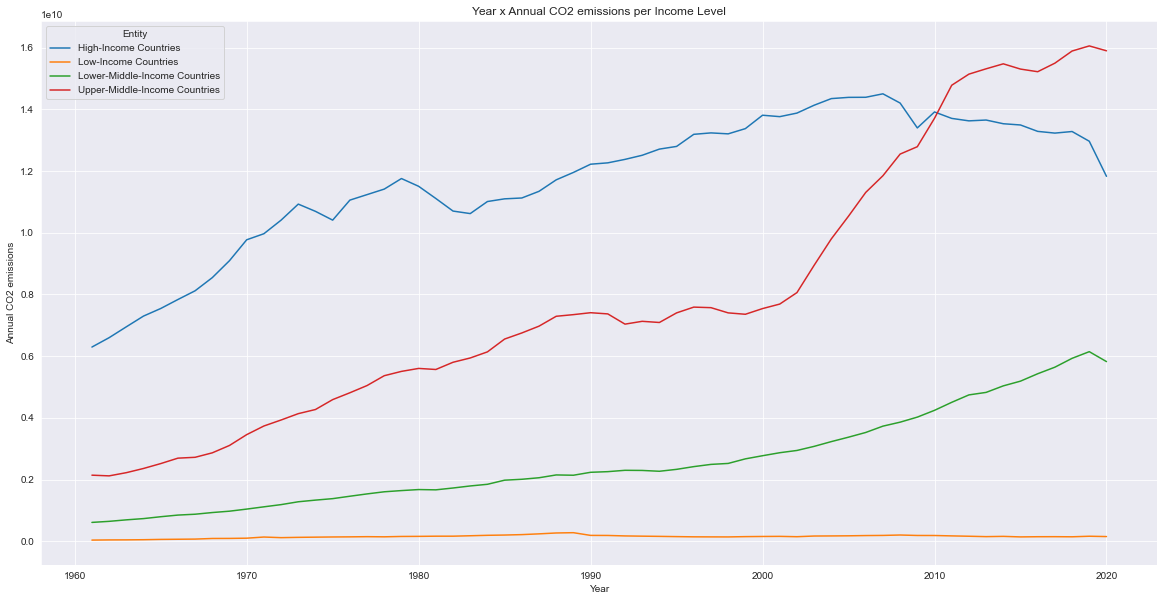

In [26]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per Income Level")

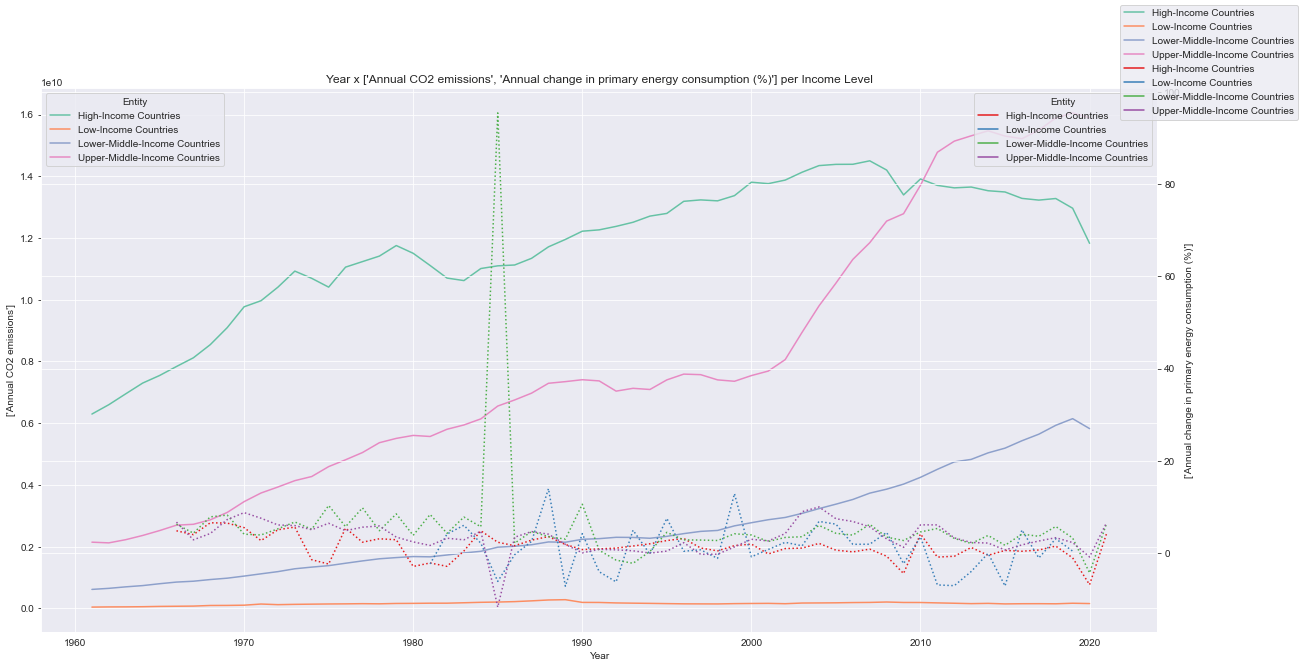

In [27]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per Income Level")

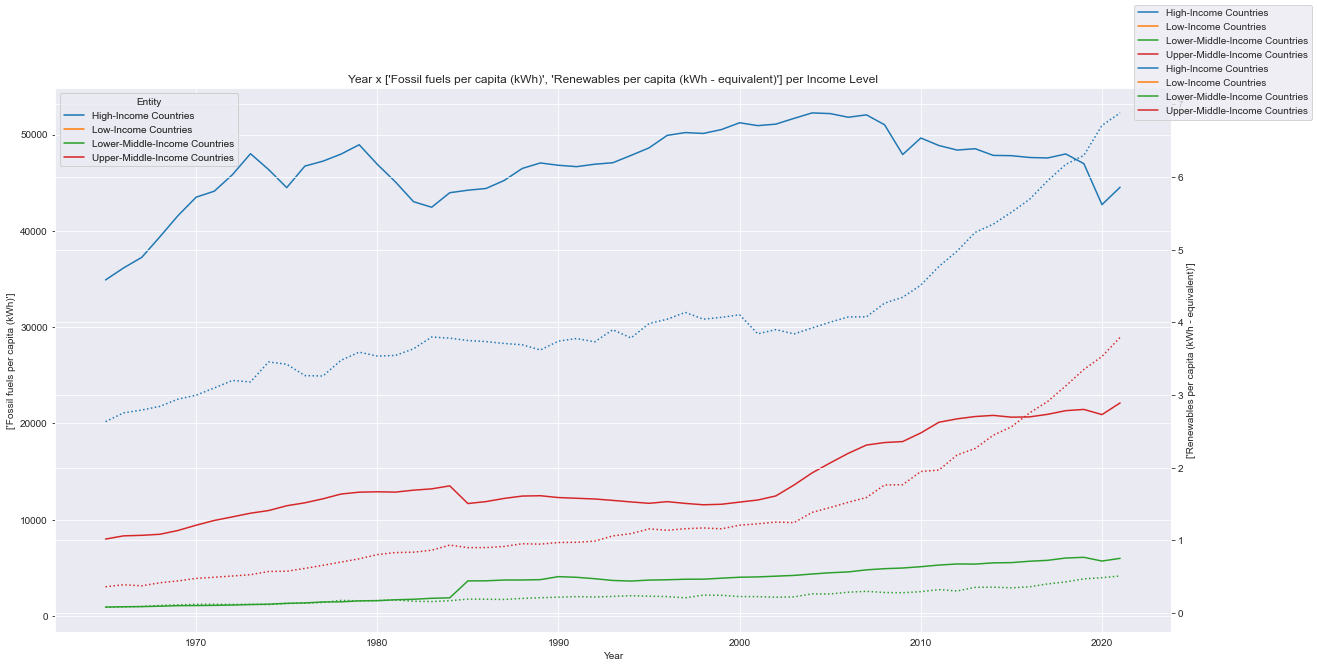

In [28]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Solar Generation - TWh', 'prod of Electricity from solar (TWh)'] per Income Level")

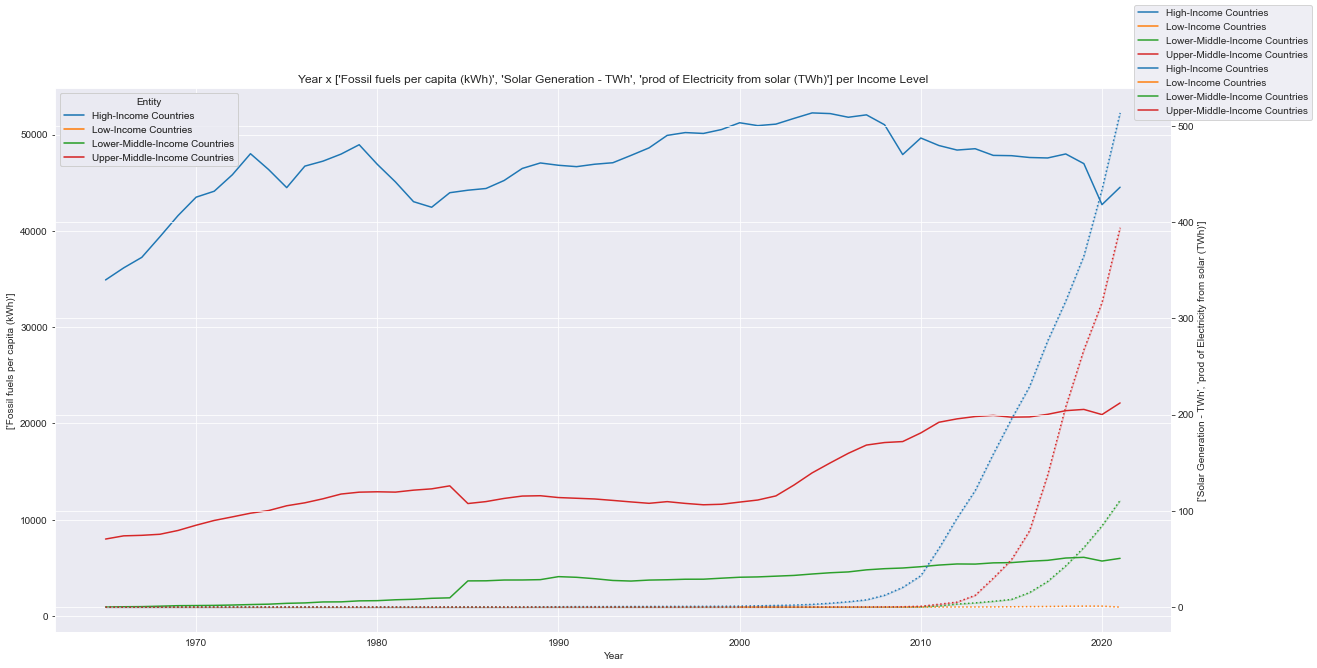

In [29]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [30]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

Text(0.5, 1.0, 'Correlation of Key Metrics across each Category [Income Level]')

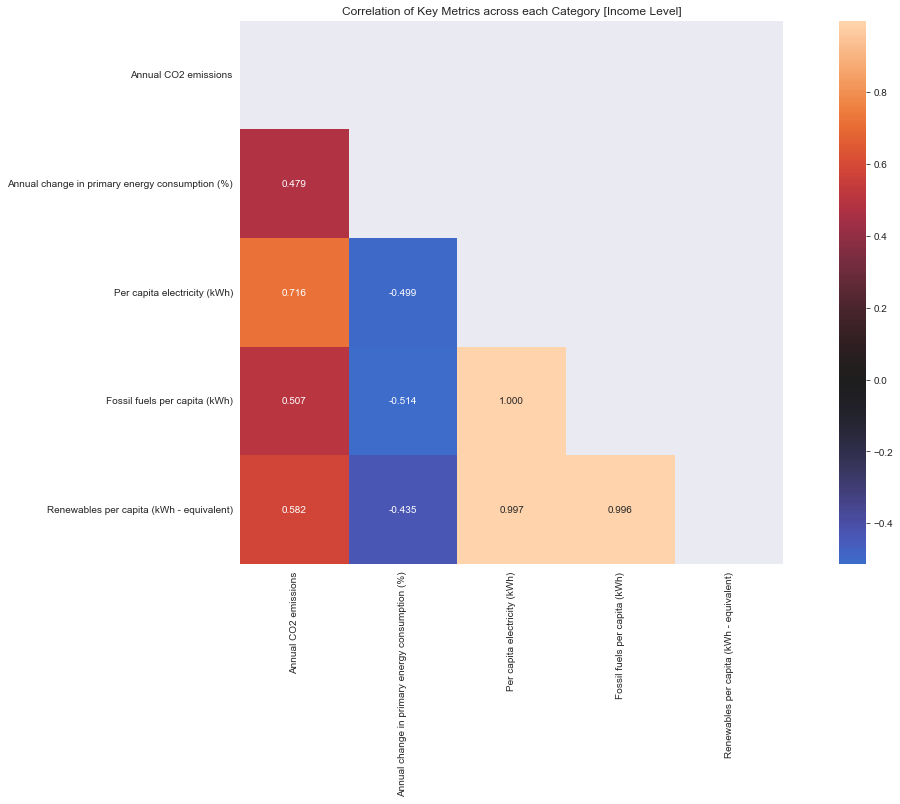

In [31]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")

### Continent

In [32]:
category_filter = "Continent"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [33]:
df.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh),Entity_Category
149,Africa,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162078599.0,NaN,Continent
150,Africa,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166426479.0,NaN,Continent
151,Africa,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176448437.0,NaN,Continent
152,Africa,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193763891.0,NaN,Continent
153,Africa,1965,NaN,NaN,NaN,NaN,94.25251,NaN,NaN,NaN,12291.0,323.496124,0.128437,0.0,NaN,2106.226318,674.302673,1235.100952,NaN,13.905636,12291.0,NaN,13.905636,12291.0,NaN,NaN,NaN,NaN,NaN,341.262756,NaN,NaN,NaN,9.543755,NaN,213784592.0,0.0,Continent


In [34]:
df.describe()

,Year,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh)
count,344.000000,285.000000,280.000000,260.000000,6.000000e+01,324.000000,285.000000,285.000000,273.000000,279.000000,285.000000,285.000000,285.000000,205.000000,285.000000,324.000000,267.000000,285.000000,324.000000,0.0,319.000000,279.000000,0.0,185.000000,285.000000,185.000000,60.000000,267.000000,285.000000,0.0,3.210000e+02,273.000000
mean,1992.020349,85.437044,2.599684,4514.057994,1.812250e+07,2647.956790,5625.187544,2.453497,46.780487,40.899666,22282.951734,17589.543097,7655.494867,6143.792222,476.824946,2647.956790,17.426988,476.824946,2647.956790,NaN,2.458146,40.899666,NaN,4025.658106,7709.957319,29.350527,15.683462,17.426988,4254.398770,NaN,4.144626e+09,46.780487
std,17.269165,9.023672,3.749343,3792.127104,5.101169e+03,2509.215237,7350.825759,1.936062,115.947183,56.691913,20069.423194,16266.258445,5029.618254,7268.643233,358.387674,2509.215237,63.247649,358.387674,2509.215237,NaN,6.977064,56.691913,NaN,3378.704635,6004.410714,22.870495,2.794608,63.247649,4016.079317,NaN,4.241829e+09,115.947183
min,1961.000000,60.153706,-10.257816,30.172163,1.811306e+07,0.000000,66.624680,0.128437,0.000000,0.000000,2106.051270,674.302673,1235.100952,78.990776,13.905636,0.000000,0.000000,13.905636,0.000000,NaN,-95.005081,0.000000,NaN,466.092743,341.262756,12.360984,11.145485,0.000000,9.543755,NaN,3.664000e+03,0.000000
25%,1978.000000,81.722176,0.518677,872.655258,1.812460e+07,248.750000,507.246979,0.321926,0.000000,3.204722,5029.313477,3225.641113,3880.907471,1264.931396,149.045563,248.750000,0.000000,149.045563,248.750000,NaN,0.177598,3.204722,NaN,1042.379517,1734.740723,16.439018,13.293853,0.000000,521.825256,NaN,6.676582e+08,0.000000
50%,1992.500000,89.619415,2.526265,3746.651489,1.812460e+07,1519.500000,4050.202148,2.427273,0.190800,16.227060,10257.729492,19134.830078,7299.555176,4498.670898,506.040619,1519.500000,0.009186,506.040619,1519.500000,NaN,2.534151,16.227060,NaN,2628.798828,8636.170898,17.990870,15.405879,0.009186,2777.180664,NaN,3.771441e+09,0.190800
75%,2007.000000,92.074448,5.072358,7806.816772,1.812460e+07,4824.250000,6721.992188,4.404799,14.223822,64.038774,41212.937500,26455.843750,8700.134766,7067.227051,670.596619,4824.250000,0.927751,670.596619,4824.250000,NaN,4.852182,64.038774,NaN,6556.126465,12275.271484,25.492777,18.128320,0.927751,7569.074219,NaN,6.421483e+09,14.223822
max,2021.000000,94.883224,16.714907,14309.506836,1.812756e+07,12382.000000,36037.972656,6.185515,785.607178,336.357239,63749.539062,76744.687500,23247.154297,33334.093750,1980.761597,12382.000000,579.658935,1980.761597,12382.000000,NaN,36.785065,336.357239,NaN,10285.139650,24867.578125,82.105980,20.405282,579.658936,16249.497070,NaN,2.060859e+10,785.607178


#### Lineplots - Yearly

In [35]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Continent')

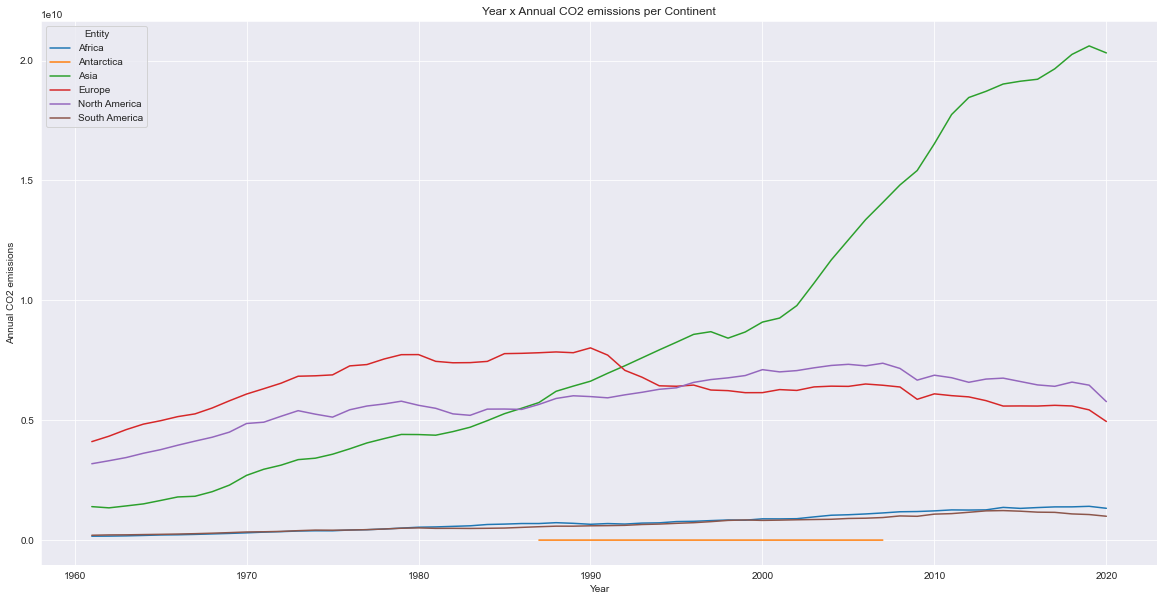

In [36]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per Continent")

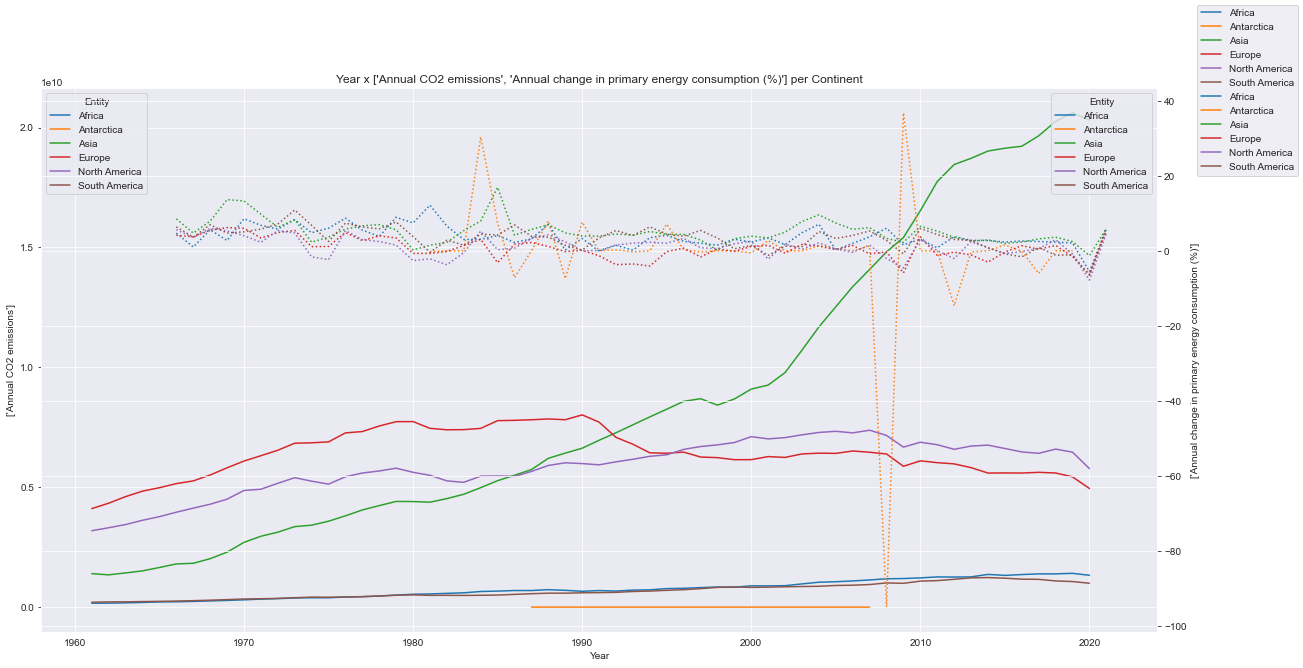

In [37]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per Continent")

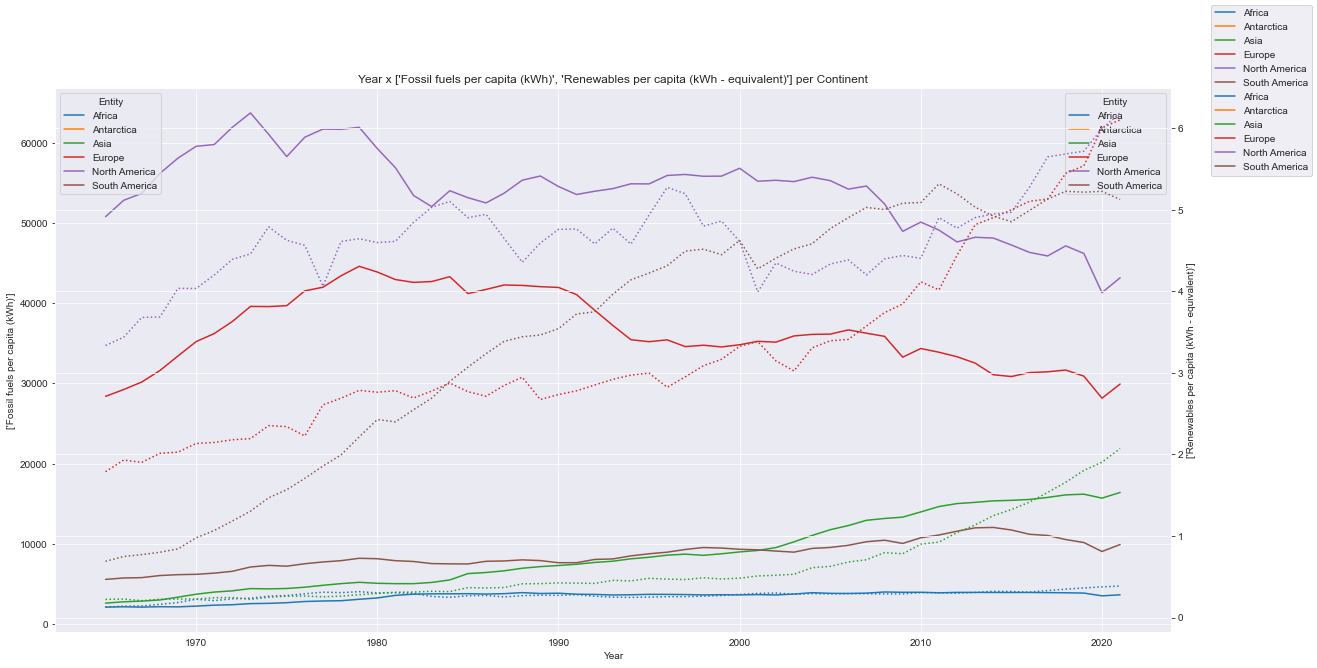

In [38]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Solar Generation - TWh', 'prod of Electricity from solar (TWh)'] per Continent")

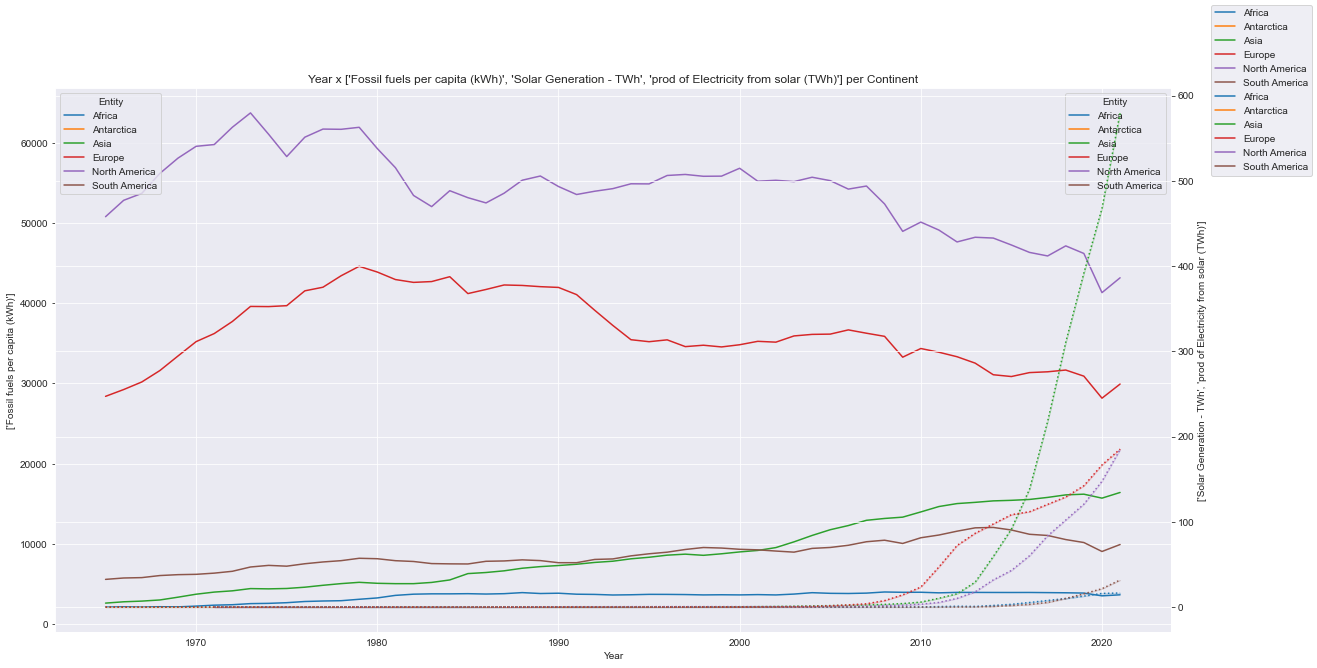

In [39]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [40]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

Text(0.5, 1.0, 'Correlation of Key Metrics across each Category [Continent]')

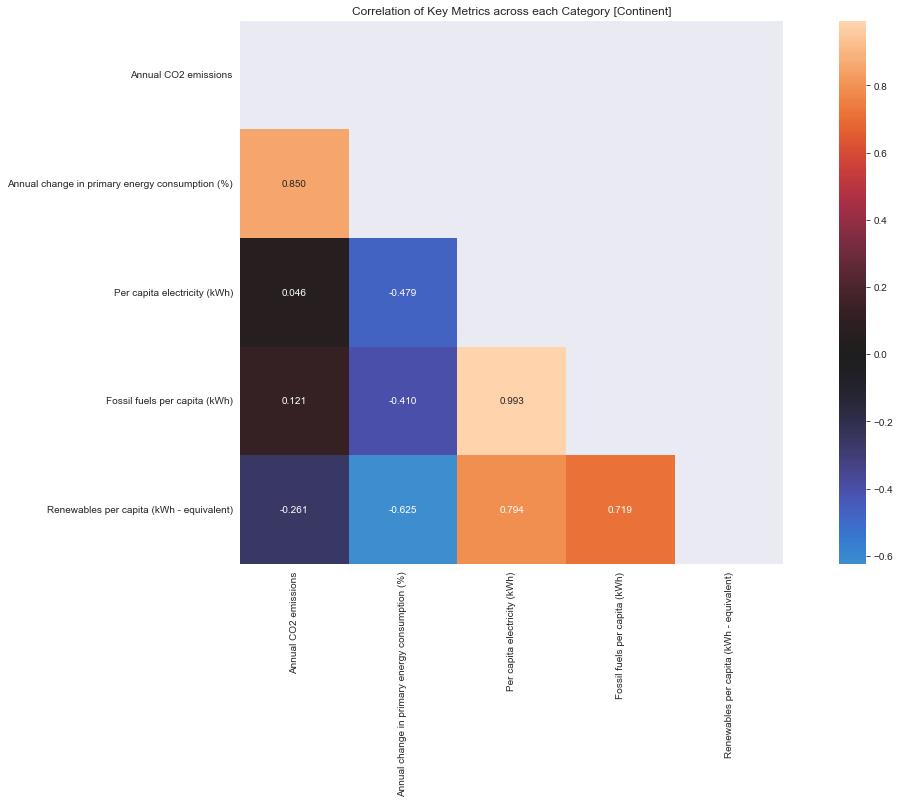

In [41]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")

### Specific Countries

In [43]:
category_filter = "Country"

df = df_original.copy().loc[
    (df_original['Entity_Category'] == category_filter)
    & (df_original['Entity'].isin(country_list))
]

In [44]:
df.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh),Entity_Category
9918,Ghana,1961,GHA,Sub-Saharan Africa,Lower middle income,IDA,NaN,NaN,NaN,227540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.097086,NaN,NaN,NaN,1344688.0,NaN,Country
9919,Ghana,1962,GHA,Sub-Saharan Africa,Lower middle income,IDA,NaN,NaN,NaN,227540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.080100,NaN,NaN,NaN,1432624.0,NaN,Country
9920,Ghana,1963,GHA,Sub-Saharan Africa,Lower middle income,IDA,NaN,NaN,NaN,227540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.082816,NaN,NaN,NaN,1722080.0,NaN,Country
9921,Ghana,1964,GHA,Sub-Saharan Africa,Lower middle income,IDA,NaN,NaN,NaN,227540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.068779,NaN,NaN,NaN,1648800.0,NaN,Country
9922,Ghana,1965,GHA,Sub-Saharan Africa,Lower middle income,IDA,NaN,NaN,NaN,227540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.013637,NaN,NaN,NaN,1703760.0,NaN,Country


In [45]:
df.describe()

,Year,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh)
count,182.000000,114.000000,112.000000,52.000000,180.000000,154.000000,114.000000,113.000000,114.000000,135.000000,114.000000,114.000000,57.000000,41.000000,113.000000,154.000000,135.000000,134.000000,154.000000,0.0,151.000000,114.000000,0.0,95.000000,114.000000,95.000000,180.000000,114.000000,114.000000,0.0,1.800000e+02,135.000000
mean,1990.835165,93.169404,10.909919,297.710938,221290.516667,5263.344156,493.112743,1.279683,0.747116,5.698022,79199.419018,2339.031468,1218.137803,36.018369,40.760278,5263.344156,3.773398,35.351876,5263.344156,NaN,9.237879,6.745026,NaN,7787.065473,1418.438444,19.096665,147.552429,4.466743,427.480340,NaN,3.606879e+08,0.630898
std,17.562053,7.472098,47.503457,204.985641,120562.022947,2466.280922,533.222085,1.289386,1.859409,9.410938,60635.104950,1980.615540,533.575688,37.288900,40.867839,2466.280922,14.073794,39.563814,2466.280922,NaN,41.385853,9.895221,NaN,4533.019064,1275.788943,26.312016,131.423791,15.223786,368.856558,NaN,4.845640e+08,1.728999
min,1961.000000,79.608032,-11.246496,8.121750,71020.000000,2478.000000,0.000000,0.000000,0.000000,0.000000,5701.004883,0.854533,158.939224,4.353467,0.000000,2478.000000,0.000000,0.000000,2478.000000,NaN,-33.705948,0.000000,NaN,268.414124,0.854533,0.000000,1.419333,0.000000,0.000000,NaN,1.099200e+04,0.000000
25%,1976.000000,85.876644,-0.274105,91.065001,71020.000000,2516.250000,0.000000,0.000000,0.000000,0.000000,34025.682617,433.771286,837.894653,7.967745,0.000000,2516.250000,0.000000,0.000000,2516.250000,NaN,-0.307944,0.000000,NaN,6009.556397,227.300613,0.003707,37.571667,0.000000,74.593466,NaN,6.178898e+06,0.000000
50%,1991.000000,95.624290,3.530502,317.459991,227540.000000,5570.500000,285.246346,1.807716,0.000000,0.010000,39942.439453,1442.673950,1302.895874,18.878025,64.461998,5570.500000,0.000000,6.335000,5570.500000,NaN,3.640008,0.006000,NaN,8575.028320,778.247498,9.316031,92.341206,0.000000,362.309998,NaN,5.542978e+07,0.000000
75%,2006.000000,100.000000,9.734333,489.961876,364500.000000,8193.750000,906.468689,2.337947,0.000960,11.984570,127611.273438,4414.742798,1588.110840,52.390591,80.816002,8193.750000,0.072711,79.345392,8193.750000,NaN,9.734577,14.668138,NaN,10543.616695,2705.307434,17.323944,305.248295,0.309019,695.700027,NaN,8.984534e+08,0.000000
max,2021.000000,100.000015,492.819305,595.366882,366700.000000,12984.000000,1415.963501,4.468073,8.249907,35.757641,217244.671875,5200.919434,2121.074707,114.608490,94.416000,12984.000000,86.266273,94.416000,12984.000000,NaN,492.819305,35.757641,NaN,15030.304690,3314.044434,91.725105,351.358025,86.266273,1247.521240,NaN,1.315343e+09,8.249907


#### Lineplots - Yearly

In [46]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Country')

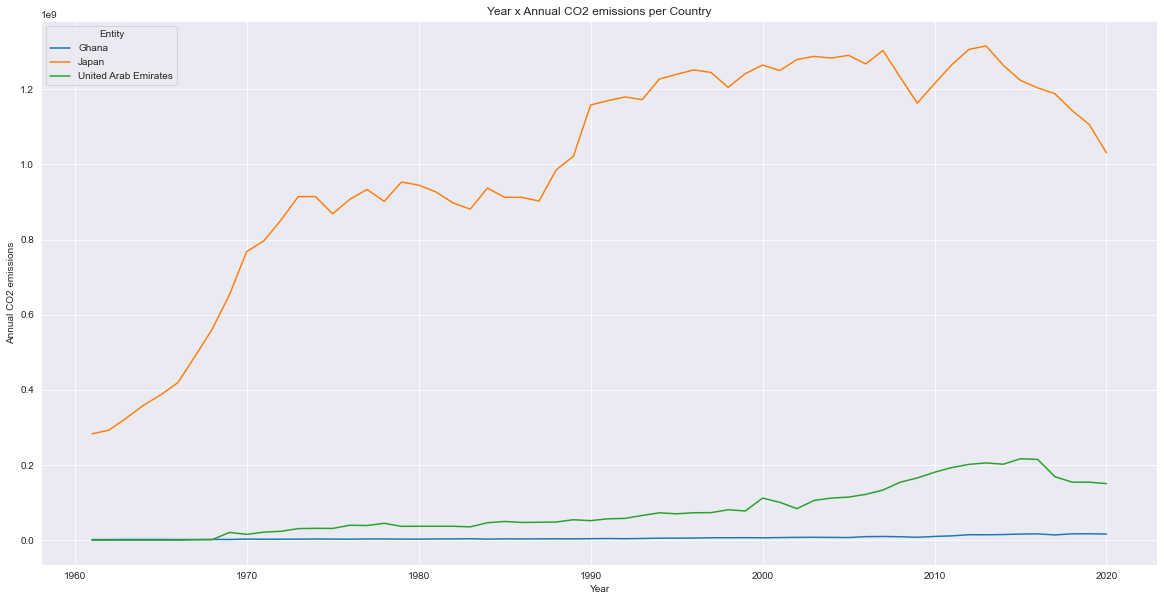

In [47]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per Country")

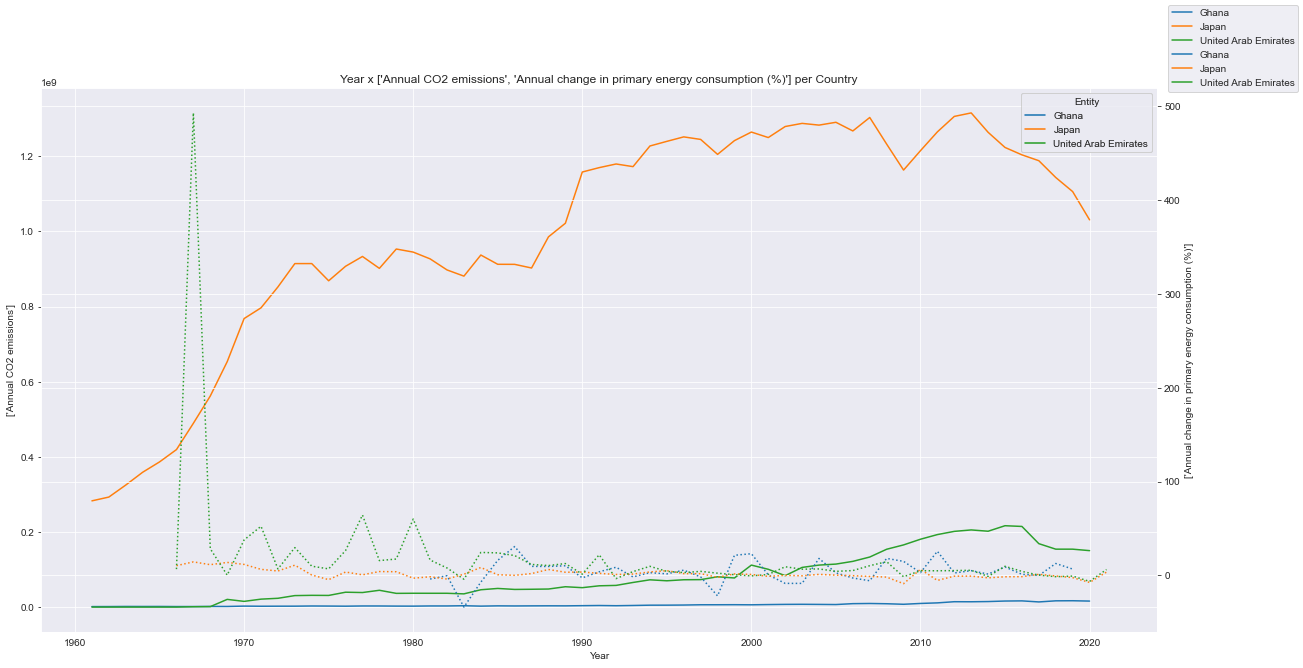

In [48]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per Country")

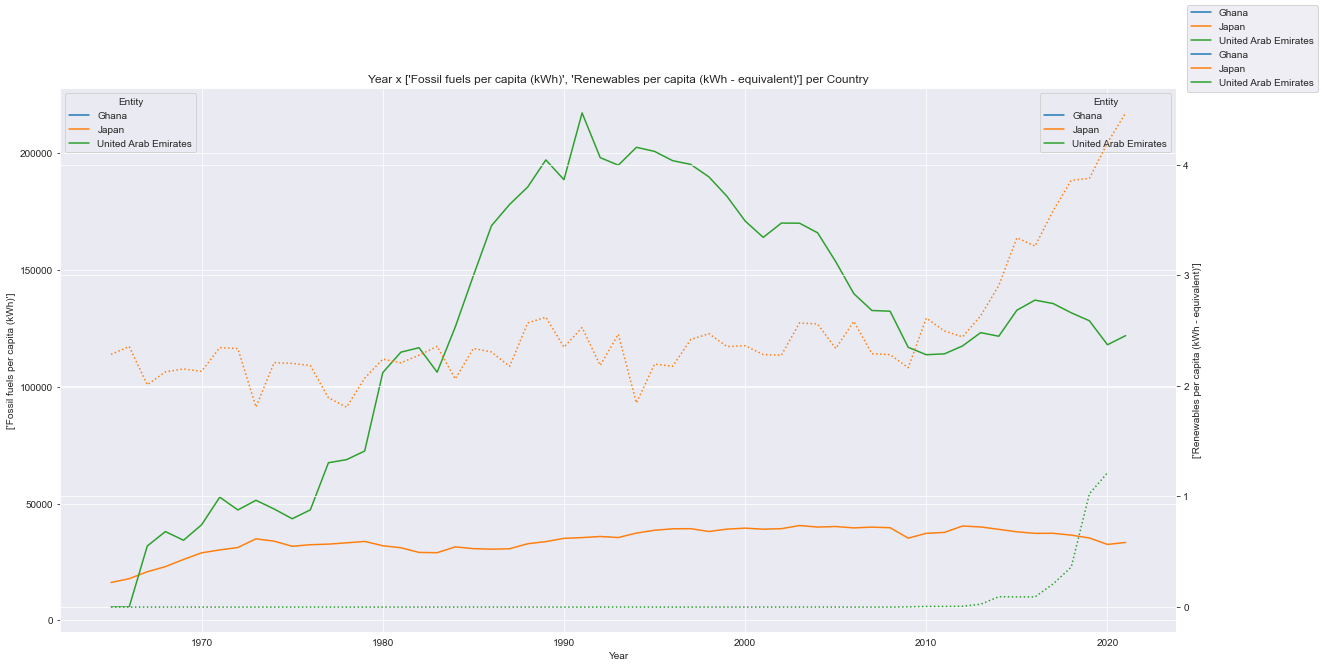

In [49]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Solar Generation - TWh', 'prod of Electricity from solar (TWh)'] per Country")

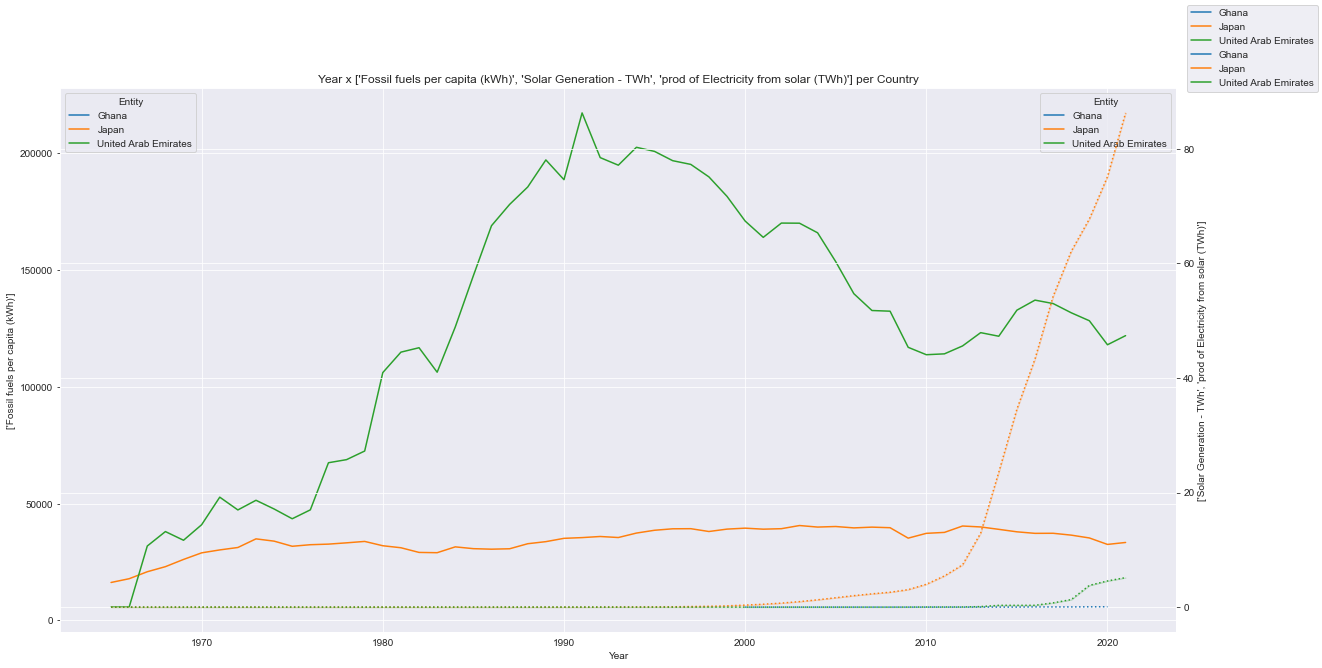

In [50]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [51]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

Text(0.5, 1.0, 'Correlation of Key Metrics across each Category [Country]')

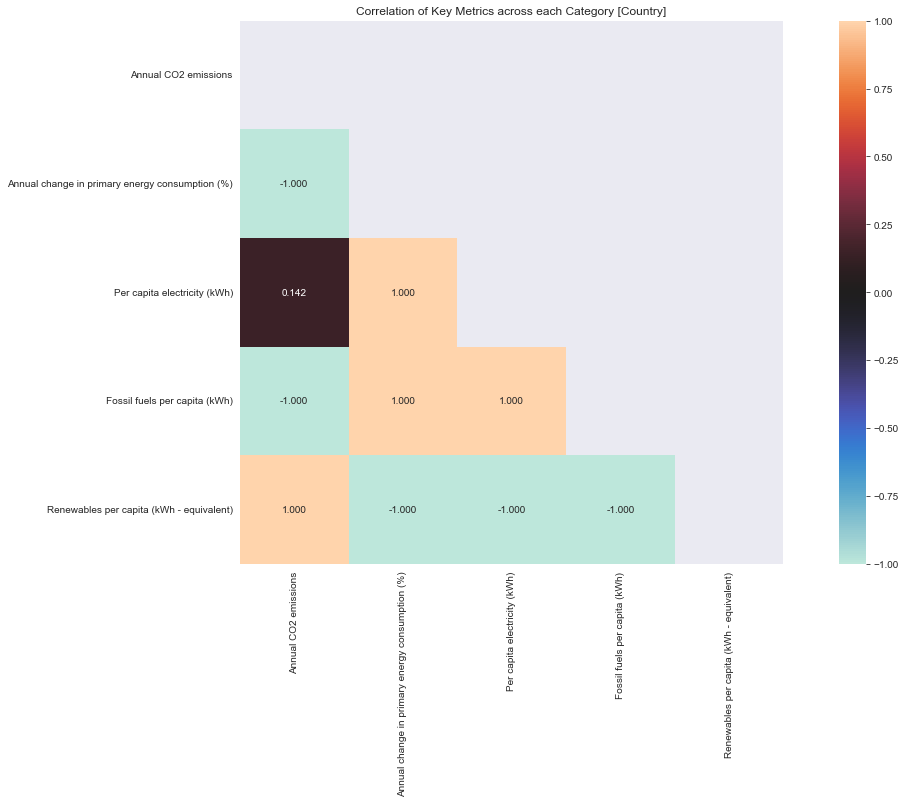

In [52]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")